<a href="https://colab.research.google.com/github/AndresMontesDeOca/RegresionAvanzada/blob/main/EjerciciosClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios Sueltos dados en Clase

In [ ]:
# Autor: Andres Montes de Oca

# Instalacion de Paquetes
!pip install pingouin # No incluido en Google Colab
# !pip install scipy
# !pip install statsmodels


# Cargamos Librerias y Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt

# Ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

# Asthetics
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=1, color_codes=True)


# Version rpy2 que no tiene problemas de compatibilidad
!pip install rpy2==3.5.1

# activate R magic
%load_ext rpy2.ipython

# Import rpy2 for dataframe conversion
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import globalenv

# Carga de Datasets

In [122]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################# Datasets ###################################
# Grasa de Cerdos
id = '153lGVzdixcHT-keKg8qmvaoWdPHg6_tB'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('grasacerdos.xlsx')
dataG = pd.read_excel('grasacerdos.xlsx', index_col='Obs') # Cargamos el Dataset
dataG = dataG.replace(to_replace=',', value='.', regex=True) # Reemplazo , por .
dataG = dataG.astype('float') # Transformo en float

######################################################
# Peso, Edad, Colesterol
id = '17Dv1WcWlc9ojWa6bnSfD7TCRaVKCKqj0'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('peso_edad_colest.xlsx')
dataP = pd.read_excel('peso_edad_colest.xlsx')
%R -i dataP
######################################################
# Cars con Modelo Lineal
id = '15pf-6P4Ek2rp6mYmfOybHRqAxqOoTp6i'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('cars.csv')
dataC = pd.read_csv('cars.csv')
%R -i dataC
model_cars = smf.ols('dist ~ speed', data=dataC).fit()
######################################################
# University
id = '16kLQNXhyweAi38xR2IeQCCagVcU725UZ'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('University.csv')
dataU = pd.read_csv('University.csv')
######################################################
# Iris
dataI = sns.load_dataset('iris')
%R -i dataI
######################################################
# Gorriones
id = '15G6jIOMiuWaTs-qy7eUXwhED4delBMl6'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('gorriones.xlsx')
dataO = pd.read_excel('gorriones.xlsx')
dataO.rename(columns=
            {'largototal':'Largo', 'extension ':'Alas', 'cabeza':'Cabeza',
             'humero':'Pata', 'esternon':'Cuerpo', 'sobrevida ':'Target'},
            inplace=True)
%R -i dataO
######################################################
# Madera
id = '17F8XFNpCszGHFfs7CpXzZotfmWmXXhoi'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('madera.csv')
dataM = pd.read_csv('madera.csv').drop(columns='Unnamed: 0')
%R -i dataM

######################################################
# Duncan
id = '17aCADG_APoFTsCdPvdI5T25gBAUE8U2T'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Duncan.csv')
dataD = pd.read_csv('Duncan.csv')
%R -i dataD

#### Instalacion de Librerias para R en Google Colab

In [104]:
%%R

### MVN Henze-Zirkler Test ### -> Lento
# # system(sudo apt install libgsl-dev)
# install.packages('MVN')

## Wald Test ### -> Rapido
install.packages('aod')

## QQ Plot, Bonferroni ### -> Lento
install.packages('car')

## LRM Tests ### -> Rapido?
install.packages('lmtest')

## Box-Cox Transformation ### -> Rapido
install.packages('MASS')


####################################
### Installation Status ###
# print(system.file(package='MVN'))

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxVQ9am/downloaded_packages’

(as ‘lib’ is unspecified)





































































	‘/tmp/RtmpxVQ9am/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxVQ9am/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxVQ9am/downloaded_packages’



### Clase #2

In [29]:
# print(dataO.describe(), '\n')
# %R print(summary(dataO))

In [30]:
%%R

# model_colest_R = lm('colest ~ edad', data=dataP)
# residuos <- model_colest_R$residuals
# print(summary(model_colest_R))
# print(anova(model_colest_R))

# Bandas de Prediccion
# predichos <- predict(object=model_colest_R, interval='prediction', level=0.95)

# Test de Normalidad adicionales
# install.packages('nortest')
# library(nortest)
# lillie.test(residuos)
# install.packages('car')
# library(car)
# qqPlot(residuos, pch=19)

# Autocorrelacion de Residuos
# install.packages('lmtest')
# library(lmtest)
# dwtest(model_colest_R, alternative='two.sided', iterations=1000)

# Deteccion Outliers
# library(car)
# qqPlot(residuos)
# print(outlierTest(model_colest_R))
# influenceIndexPlot(model_colest_R, vars='Bonf')

In [31]:
# # No Outliers tests found in Python
%%R

# library(car)

# # Outliers - Bonferroni
# qqPlot(residuos)
# outlierTest(model_colest_R)
# influenceIndexPlot(model_colest_R, vars='Bonf')

# Influyentes - Leverage
# crit_leverage <- 3*mean(hatvalues(model_colest_R))
# leverage <- hatvalues(model_colest_R) > crit_leverage
# data_leverage = cbind(hatvalues(model_colest_R), crit_leverage, leverage)

# # Influyentes - Cook
# influenceIndexPlot(model_colest_R, vars='Cook')

# Influyentes - DFFITS (revisar indices)
# p <- length(model_colest_R$coefficients)
# n <- NROW(model_colest_R$residuals)
# dffits_crit = 2*sqrt(p/n)
# dffits = dffits(model_colest_R)
# data_dffits = data.frame(obs=names(dffits), dffits=dffits)

NULL


In [32]:
# # Exporto a Python y grafico
# %R -o data_dffits
# %R -o dffits_crit

# data_dffits.head()
# sns.scatterplot(data=data_dffits, x=data_dffits.index, y='dffits')
# plt.axhline(y=dffits_crit, linestyle='--', color='red')
# plt.axhline(y=-dffits_crit, linestyle='--', color='red')
# plt.show()

In [ ]:
# Analisis analitico del modelo
%%R

# print(head(dataM))
# mod_mad = lm('resist ~ madera', data=dataM)
# print(summary(mod_mad))
# coef = mod_mad$coef
# resid = mod_mad$resid

In [58]:
# Analisis grafico
# %R -o coef
# print(coef)
# sns.regplot(data=dataM, x='madera', y='resist')
# plt.show()

# plt.plot(dataM.madera, dataM.madera*coef[1]+coef[0])
# plt.ylim(0)
# sns.scatterplotw(data=dataM, x='madera', y='resist')
# plt.show()

In [59]:
# # Analisis de Residuo

# %R -o resid

# # resid = pd.Series(resid, name='Residuo')
# print(pg.normality(resid))
# # print(st.anderson(resid))

# # pg.qqplot(resid)
# # %R qqPlot(resid)

# # Analsis grafico a mano usando Matplotlib
# plt.scatter(x=dataM.index, y=resid)
# plt.xlabel( 'Index')
# plt.ylabel('Residuo')
# plt.title('Correlacion de Residuos')
# plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
# plt.show()
# # No se observa estructura

# # Durbin-Watson Test: 2=No Correlacion (Independecia?)| 0=Correlacion Pos | 4=Correlacion Neg
# print('Durbin-Watson:', sm.stats.durbin_watson(resid)) # Sin validacion Estadistica

In [36]:
# %%R

# # print(dwtest(mod_mad, alternative='two.sided', iterations=1000)) #H0 No Auto-Correlacion
# # print(outlierTest(mod_mad))
# # influenceIndexPlot(mod_mad, vars='Bonf')

# # # Influyentes - Cook
# influenceIndexPlot(mod_mad, vars='Cook')


# # # Influyentes - Leverage
# crit_leverage <- 3*mean(hatvalues(mod_mad))
# leverage <- hatvalues(mod_mad) > crit_leverage
# print(sum(leverage))
# # print(cbind(hatvalues(mod_mad), crit_leverage, leverage))


# # Influyentes - DFFITS (revisar indices en plot)
# p = length(mod_mad$coefficients)
# n = NROW(mod_mad$residuals)
# dffits_crit = 2*sqrt(p/n)
# dffits = dffits(mod_mad)
# data_dffits = data.frame(dffits=dffits)
# print(data_dffits)


In [37]:
# # Influyentes - DFBetas
# %%R

# dfbetas_crit <- 1 # Umbral estandard
# dfbetas(mod_mad)[,2]>dfbetas_crit

In [38]:
# # Exporto a Python y grafico
# %R -o data_dffits
# %R -o dffits_crit

# data_dffits.head()
# sns.scatterplot(data=data_dffits, x=data_dffits.index, y='dffits')
# plt.axhline(y=dffits_crit, linestyle='--', color='red')
# plt.axhline(y=-dffits_crit, linestyle='--', color='red')

In [39]:
# %%R

# predicted = mod_mad$fitted.values
# resid = mod_mad$resid

# library(lmtest)
# bptest(mod_mad)

In [40]:
# library(lmtest)
# dwtest(model_colest_R, alternative='two.sided', iterations=1000) #H0 No Auto-Correlacion

In [41]:
# # Homocedasticidad
# # Importo a Python
# %R -o predicted
# %R -o resid

# # Analsis grafico a mano usando Matplotlib
# plt.scatter(x=predicted, y=resid)
# plt.xlabel( 'Prediccion')
# plt.ylabel('Residuo')
# plt.title('Distribucion de Residuos')
# plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
# plt.show()
# # No se observa estructura de embudo

# # # Analitico (C Test) -> H0: Residuos Homocedasticos
# # BP, p_value, _, _ =sm.stats.het_breuschpagan(model_colest.resid, model_colest.model.exog)
# # print('Estadistico BP y p-value:', BP, p_value)

In [60]:
# # Buevo modelo con Variable transformada
# %%R

# madera2 = dataM$madera**2
# dataM2 = data.frame(dataM, madera2)

# mod_mad2 = lm('resist ~ madera + madera2', data=dataM2)
# print(summary(mod_mad2))

In [61]:
# %R -o dataM2

# dataM2 = sm.add_constant(dataM2)
# mod_mad2 = smf.ols('resist ~ madera + madera2', data=dataM2).fit()

# mod_mad2.summary()


In [44]:
# # Wald Test -> Significatividad de cada Variable
# %%R

# # install.packages('aod')
# # library(aod)

# # # Generamos el Modelo
# # model_gorr = lm('Largo ~ Alas + Cabeza + Pata + Cuerpo', data=dataO)
# # print(summary(model_gorr))

# # # Wald Test para indentificar variables significativas
# wald.test(Sigma = vcov(mod_mad2), b = coef(mod_mad2), Terms = 1) # Cuerpo| H0: Coef = 0 (Var no significativa)


In [45]:
# # Box Cox Transformation

# %%R

# # install.packages('MASS')
# # library(MASS)

# mod_cars <- lm('dist ~ speed', data=dataC)
# # print(summary(mod_cars))
# print(shapiro.test(mod_cars$resid))

# boxcox(object = mod_cars, plotit=TRUE)

# mod_cars2 <- lm('dist**0.5 ~ speed', data=dataC)
# print(summary(mod_cars2))
# print(shapiro.test(mod_cars2$resid))

In [46]:
# # Cuadrados Minimos Ponderados (WLS) en R
# # CAMBIAR EL DATASET DE EJEMPLO
# %%R

# # Generamos el modelo y verificamos la Heterocedasticidad de los residuos analiticamente
# ols_inspec <- lm('inspectores ~ choferes', data=dataCh)
# print(bptest(ols_inspec))

# # Confirmamos con el analisys grafico en Python

# # Generamos la ponderacion de pesos y modelamos de nuevo
# pesos = I(1/ols_onspec$fitted.values**2) # A los valores mas alejados se le reduce el peso
# wls_inspec <- lm('inspectores ~ choferes', data=dataCh, weights=pesos)
# print(summary(wls_inspec))

### Clase 3

In [62]:
# # Filtro el DF
# data = dataU[['nassets', 'stfees']]

# display(data.head())

# # Importo a R
# %R -i data

# # Ploteamos la Regresion
# sns.regplot(data=data, x='stfees', y='nassets')
# plt.show()

In [63]:
# %%R

# model = lm('nassets ~ stfees', data=data)
# resid = model$resid
# predicted = predict(model)
# fitted = model$fitted.values

# # Testeamos Normalidad de Residuos
# print(shapiro.test(resid))
# # qqPlot(resid)
# # Residuos no Normales

In [64]:
# # Analsis grafico de Homosedasticidad

# # Importo Datos desde R
# %R -o resid
# %R -o predicted
# %R -o fitted

# plt.scatter(x=predicted, y=resid)
# plt.xlabel( 'Prediccion')
# plt.ylabel('Residuo')
# plt.title('Distribucion de Residuos')
# plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
# plt.show()
# # Si se observa estructura de embudo

In [65]:
# %%R
# library(lmtest)

# # Test de Homocedasitcidad
# print(bptest(model))

# # Test de Auto-Correlacion
# print(dwtest(model, alternative='two.sided', iterations=1000)) #H0 No Auto-Correlacion

In [66]:
# %%R
# print(model)

In [67]:
# # display(data.head())

# nassets_log10 = pd.Series(np.log10(data['nassets']), name='nassets_log10')
# stfees_log10 = pd.Series(np.log10(data['stfees']), name='stfees_log10')
# nassets_logE = pd.Series(np.log(data['nassets']), name='nassets_logE')
# stfees_logE = pd.Series(np.log(data['stfees']), name='stfees_logE')


# data = pd.concat([data, nassets_log10, stfees_log10, nassets_logE, stfees_logE], axis=1)

# # Exporto a R
# %R -i data

In [68]:
# # Transformacion Box Cox
# %%R

# library(MASS)

# # Buscamos el Landa optimo -> Si Lambda  = 0 -> log10(y) | y**Lambda
# # boxcox(object = model_2, plotit=TRUE)

# # Generamos el nuevo modelo con la variable dependiente transformada, y verificamos su nueva normalidad
# model_2 <- lm('nassets_log10 ~ stfees_log10', data=data)

# # Normalidad
# print(shapiro.test(model_2$resid))

# # Test de Homocedasitcidad
# print(bptest(model_2))

# # Test de Auto-Correlacion
# print(dwtest(model_2, alternative='two.sided', iterations=1000)) #H0 No Auto-Correlacion
# # No olvidarse de anti-transformar en los IC, IP y Fit

In [69]:
# # Bandas de Prediccion

# %R predichos <- predict(object=model_2, interval='prediction', level=0.95)
# %R nuevos_datos <- data.frame(predichos, data)

# %R -o nuevos_datos

# display(nuevos_datos.head())

# # Grafico
# sns.regplot(data=nuevos_datos, x='stfees_log10', y='nassets_log10')
# sns.lineplot(data=nuevos_datos, x='stfees_log10', y='lwr', linestyle='--', color='r')
# sns.lineplot(data=nuevos_datos, x='stfees_log10', y='upr', linestyle='--', color='r')
# plt.show()


In [70]:
# valores = [10000]

# newdata = pd.Series(np.log10(valores), name='stfees_log10').to_frame()
# %R -i newdata
# display(newdata)



In [71]:
# %%R
# print(class(newdata))

# predict(object=model_2, newdata=newdata)


### Clase 3: Teoria

In [124]:
data = dataD
%R -i data
data.head()

,Unnamed: 0,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90


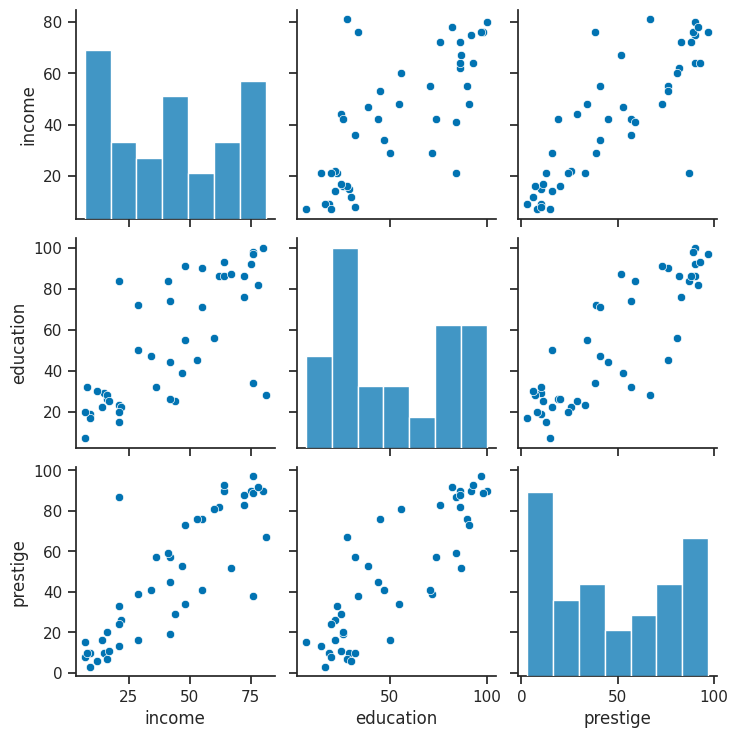

<Axes: >

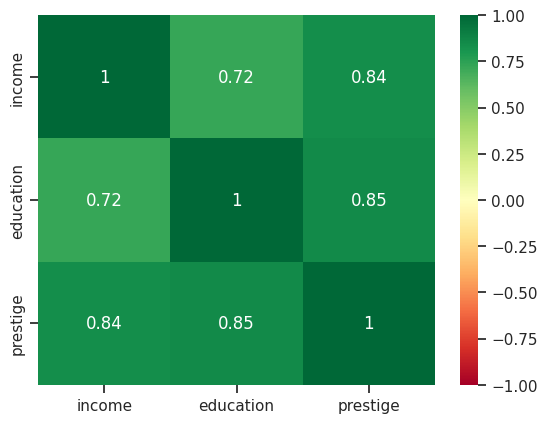

In [125]:
sns.pairplot(data=data)
plt.show()

display(sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)) # Todos contra todos
plt.show()

In [126]:

%%R

model <- lm('income ~ education', data=data)
resid <- model$resid
fitted <- model$fitted.values
print(summary(model))


Call:
lm(formula = "income ~ education", data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.572 -11.346  -1.501   9.669  53.740 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.6035     5.1983   2.040   0.0475 *  
education     0.5949     0.0863   6.893 1.84e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.04 on 43 degrees of freedom
Multiple R-squared:  0.5249,	Adjusted R-squared:  0.5139 
F-statistic: 47.51 on 1 and 43 DF,  p-value: 1.84e-08



In [127]:
# LRM en Python

data = sm.add_constant(data)
model = smf.ols('income ~ education', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.84e-08
Time:                        07:27:16   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6035      5.198      2.040      0.0

In [128]:
data.head()

,const,Unnamed: 0,type,income,education,prestige
0,1.0,accountant,prof,62,86,82
1,1.0,pilot,prof,72,76,83
2,1.0,architect,prof,75,92,90
3,1.0,author,prof,55,90,76
4,1.0,chemist,prof,64,86,90


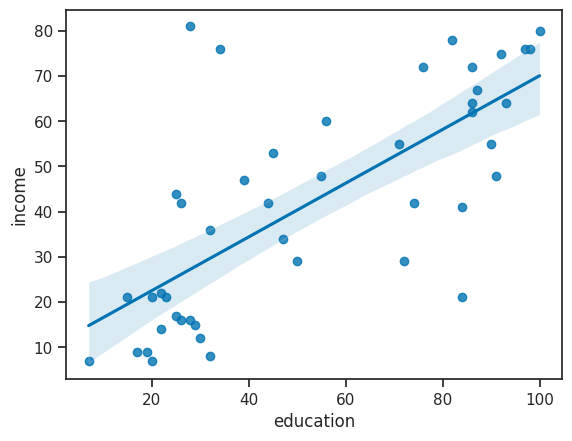

In [129]:
sns.regplot(data=data, x='education', y='income')
plt.show()

In [130]:
%%R

print(shapiro.test(resid))


	Shapiro-Wilk normality test

data:  resid
W = 0.94462, p-value = 0.03189



In [131]:
# Analisis Analitico (Breusch-Pagan Test) -> R | H0: Residuos Homocedasticos
%%R

library(lmtest)
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 0.28649, df = 1, p-value = 0.5925



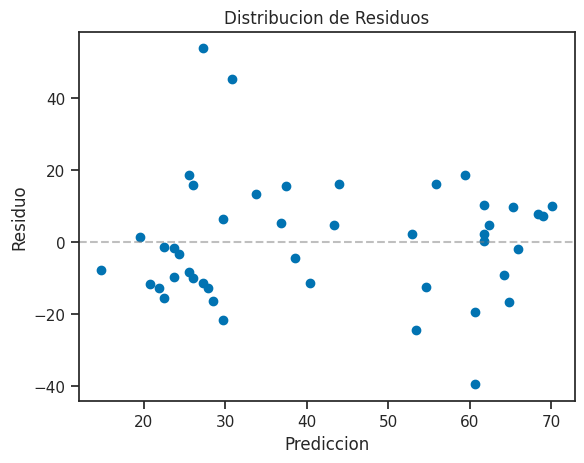

In [133]:

# # Analsis Grafico -> Python

# Importamos desde R
%R -o resid
%R -o fitted

plt.scatter(x=fitted, y=resid)
plt.xlabel( 'Prediccion')
plt.ylabel('Residuo')
plt.title('Distribucion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()
# No se observa estructura de embudo

# # Analisis Analitico Python
# BP, p_value, _, _ =sm.stats.het_breuschpagan(model.resid, model.model.exog)
# print('Estadistico BP y p-value:', BP, p_value)

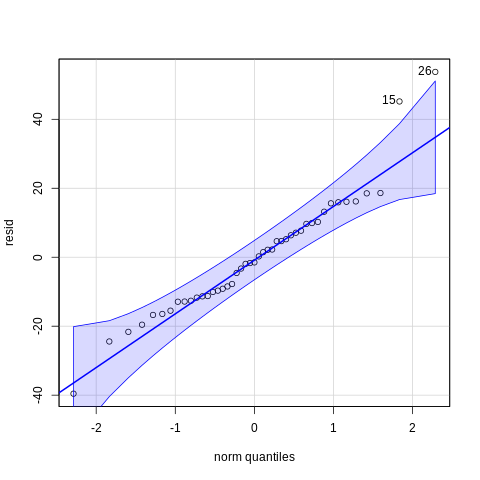

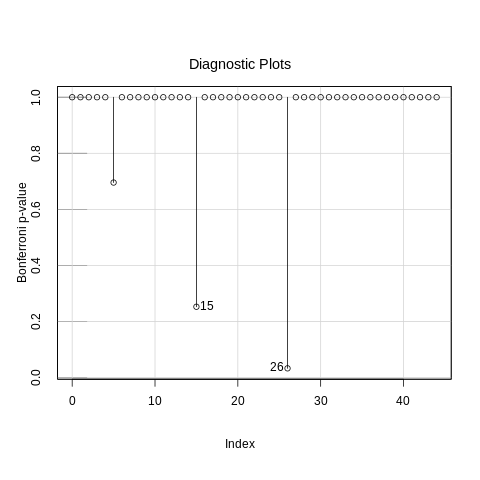

In [134]:
%%R
# Outliers - Bonferroni

library(car)

qqPlot(resid)
outlierTest(model)
influenceIndexPlot(model, vars='Bonf')

In [145]:
data.query('index == 15 or index ==26 or index ==5')

,const,Unnamed: 0,type,income,education,prestige
5,1.0,minister,prof,21,84,87
15,1.0,conductor,wc,76,34,38
26,1.0,RR.engineer,bc,81,28,67


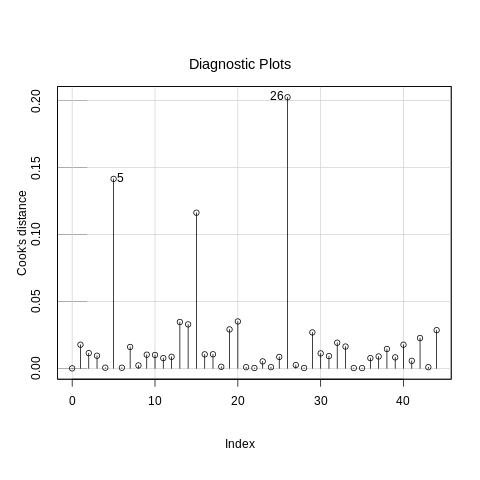

In [144]:
# Influyentes - Cook
%%R

# print(cooks.distance(model))
influenceIndexPlot(model, vars='Cook')

In [146]:
%%R
# Influyentes - DFFITS
p <- length(model$coef)
n <- NROW(model$resid)
dffits_crit <- 2*sqrt(p/n)
dffits <- dffits(model)
data_dffits <- data.frame(dffits=dffits)

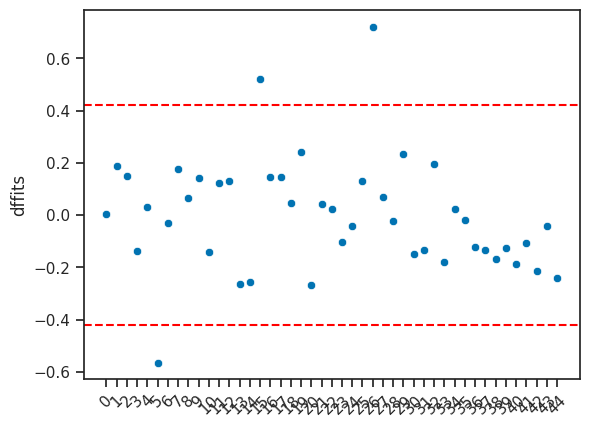

,dffits
5,-0.564301
15,0.522725
26,0.721693


In [147]:
# DFFITS Grafico -> Python
%R -o data_dffits
%R -o dffits_crit

# Grafico
data_dffits.head()
sns.scatterplot(data=data_dffits, x=data_dffits.index, y='dffits')
plt.axhline(y=dffits_crit, linestyle='--', color='red')
plt.axhline(y=-dffits_crit, linestyle='--', color='red')
plt.xticks(rotation=45)
plt.show()

# Filtro los criticos
dffits_crit_low = -dffits_crit
dffits_crit_up = dffits_crit

display(data_dffits.query('dffits > @dffits_crit_up or dffits < @dffits_crit_low'))

In [173]:
%%R
print(summary(model))


Call:
lm(formula = "income ~ education", data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.572 -11.346  -1.501   9.669  53.740 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.6035     5.1983   2.040   0.0475 *  
education     0.5949     0.0863   6.893 1.84e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.04 on 43 degrees of freedom
Multiple R-squared:  0.5249,	Adjusted R-squared:  0.5139 
F-statistic: 47.51 on 1 and 43 DF,  p-value: 1.84e-08



In [164]:
%%R
library(MASS)
library(robustbase)

# install.packages('robustbase') # Rapida

In [188]:
%%R

duncan_Huber <- rlm(income ~ education, data=data, k2=1.345)
duncan_LTS <- lqs(income ~ education, data=data, method='lts')
duncan_LAD <- rq(income ~ education, data=data, tau=0.5)

# print(summary(duncan_Huber))
# print(duncan_LTS)
#print (duncan_LAD)


Call:
rq(formula = income ~ education, tau = 0.5, data = data)

Coefficients:
(Intercept)   education 
       1.75        0.75 

Degrees of freedom: 45 total; 43 residual


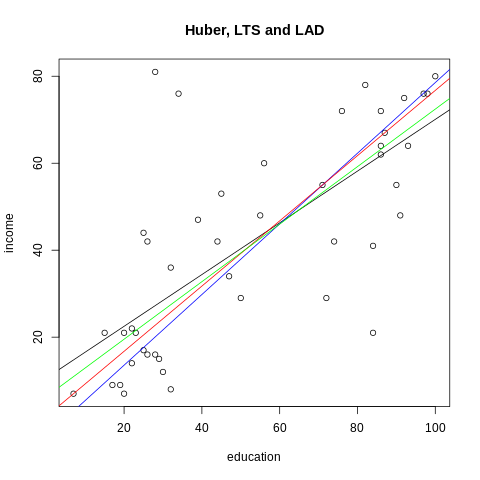

In [190]:
%%R

# Comparamos los modelos
plot(data$education, data$income, xlab='education', ylab='income', main='Huber, LTS and LAD')
abline(model, col='black')
abline(duncan_LTS, col='blue')
abline(duncan_LAD, col='red')
abline(duncan_Huber, col='green')